In [1]:
from AISoftTeam.graph import create_team, create_small_team, State

import nest_asyncio
#this is needed to run async functions sync in jupyter
nest_asyncio.apply()


In [2]:
import logfire
logfire.configure()

Logfire project URL: ]8;id=884049;https://logfire-us.pydantic.dev/gouarin/softwareteam\https://logfire-us.pydantic.dev/gouarin/softwareteam]8;;\


In [3]:
team = create_small_team()

In [4]:
state = State(messages=["Write a project using langGraph and pydantic_ai with Ollama models which simulates a developer team composed by an analyst, a coder, a tester and a reviewer."])

In [4]:
state = State(messages=["Write a Fibonacci function in Python"])

In [4]:
state = State(messages=["Write a Python code that plots the Hilbert curve for any depth using matplotlib."])

In [5]:
response = team.invoke(state)

**** Researcher ****
question:  content='Write a Fibonacci function in Python' additional_kwargs={} response_metadata={} id='7601ac8e-5702-4697-b4fc-0bc6585f5e78'
searching:  
        fibonacci function python code
    
searching:  
        iterative fibonacci algorithm python
    
**** Coder ****
09:50:10.670 agent run
09:50:10.670   preparing model request params
09:50:10.670   chat deepseek-coder-v2


KeyboardInterrupt: 

In [5]:
with open("output/analyst_response.md", "r") as f:
    xml_content = f.read()

In [9]:
from AISoftTeam.agents.coordinator import extract_code_blocks, Step

In [12]:
code_blocks = "".join(extract_code_blocks(xml_content))

In [14]:
code_blocks

'<root>\n\n    <request>\n    Write a Python code that plots the Hilbert curve for any depth using matplotlib.\n    </request>\n    \n    <step id="1">\n        <full_description>\n        The first step is to understand what a Hilbert curve is and how it can be generated. A Hilbert curve is a continuous fractal space-filling curve that visits every point in a square grid exactly once. It has applications in image processing, data compression, and database indexing due to its locality-preserving properties.\n\n        To generate the Hilbert curve for a given depth, we need to create a recursive function that builds the coordinates of each point in the curve. The function will take the current depth as an argument and return a list of (x, y) tuples representing the points along the curve.\n\n        This step involves researching existing algorithms or code snippets that can generate Hilbert curves for any given depth. We will focus on finding an iterative approach to avoid recursion i

In [8]:
import xml.etree.ElementTree as ET


In [15]:
root = ET.fromstring(code_blocks)

steps = []
for elem in root.iter():
    print(f"Tag: {elem.tag}, Attributes: {elem.attrib}")
    if elem.tag == "step":
        steps.append(Step(description=elem[0].text, web_search=elem[1].text))

Tag: root, Attributes: {}
Tag: request, Attributes: {}
Tag: step, Attributes: {'id': '1'}
Tag: full_description, Attributes: {}
Tag: web_search, Attributes: {}
Tag: step, Attributes: {'id': '2'}
Tag: full_description, Attributes: {}
Tag: web_search, Attributes: {}
Tag: step, Attributes: {'id': '3'}
Tag: full_description, Attributes: {}
Tag: web_search, Attributes: {}
Tag: step, Attributes: {'id': '4'}
Tag: full_description, Attributes: {}
Tag: web_search, Attributes: {}
Tag: step, Attributes: {'id': '5'}
Tag: full_description, Attributes: {}
Tag: web_search, Attributes: {}


In [ ]:

root = ET.fromstring(xml_content)

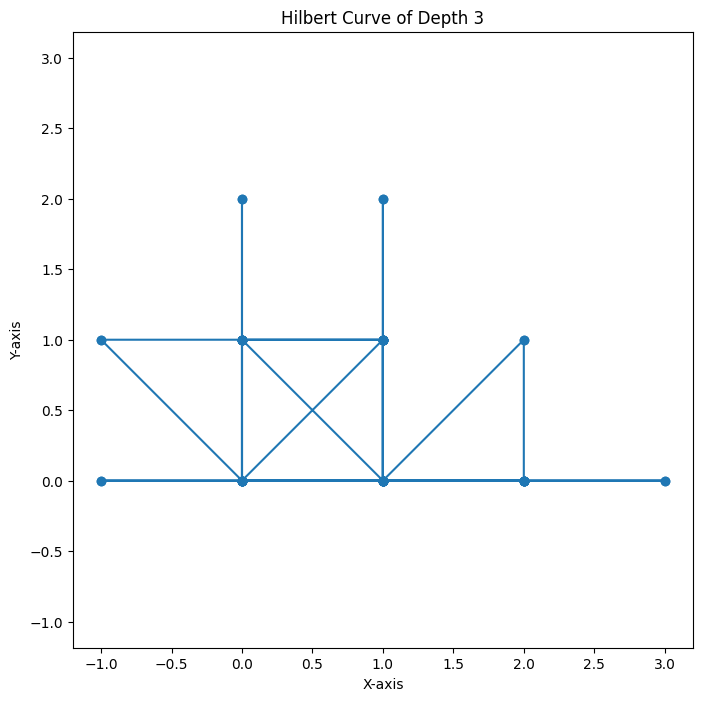

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def hilbert_curve(x, y, dx, dy, depth, points):
    """
    Recursively generates the Hilbert curve points.

    Parameters:
    x (float): Current x-coordinate.
    y (float): Current y-coordinate.
    dx (int): Direction in x-axis (-1 or 1).
    dy (int): Direction in y-axis (-1 or 1).
    depth (int): Current depth of recursion.
    points (list): List to store the curve points.

    Returns:
    None
    """
    if depth == 0:
        points.append((x, y))
        return

    # Order of processing for quadrants
    order = [0, 1, 2, 3] if depth % 2 == 0 else [3, 2, 1, 0]

    for i in order:
        nx, ny = x + dx * (i // 2), y + dy * (i // 2)
        ndx, ndy = -dy, dx
        if i % 2 == 1:
            ndx, ndy = dx, dy

        hilbert_curve(nx, ny, ndx, ndy, depth - 1, points)

def plot_hilbert_curve(depth):
    """
    Plots the Hilbert curve for a given depth.

    Parameters:
    depth (int): Depth of the Hilbert curve.

    Returns:
    None
    """
    points = []
    hilbert_curve(0, 0, 1, 0, depth, points)
    x, y = zip(*points)

    plt.figure(figsize=(8, 8))
    plt.plot(x, y, '-o')
    plt.title(f'Hilbert Curve of Depth {depth}')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.axis('equal')
    plt.show()

# Example usage
plot_hilbert_curve(3)

In [ ]:
from IPython.display import display, Markdown

display(Markdown(response["current_code_with_test"]))

To test the `generate_hilbert_curve` and `plot_hilbert_curve` functions, we can use pytest. We will write tests to ensure that the function generates the correct coordinates for a Hilbert curve at different depths and that the plot is generated correctly.

Here's how you can add the tests:

```python
# imports
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import pytest

def generate_hilbert_curve(depth):
    """
    Generate the coordinates of a Hilbert curve at a given depth.

    Parameters:
    depth (int): The depth of the Hilbert curve. Higher depths result in more complex curves.

    Returns:
    list: A list of tuples representing the (x, y) coordinates of the Hilbert curve.
    """
    if depth == 0:
        return [(0, 0)]
    
    # Recursive call for smaller depth
    sub_curve = generate_hilbert(depth - 1)
    
    # Calculate new points based on the previous curve and direction
    n = len(sub_curve)
    half_n = n // 2
    
    # Rotate and translate to form the new curve
    rotated = [(y, -x) for x, y in sub_curve]
    translated = [(x + half_n, y + half_n) for x, y in rotated]
    
    # Combine all parts of the curve
    curve = translated + [(x + n, y) for x, y in reversed(sub_curve)] + \
            [(x + n, y - n) for x, y in sub_curve] + [(x, y - n) for x, y in reversed(translated)]
    
    return curve

def plot_hilbert_curve(curve):
    """
    Plot the Hilbert curve using matplotlib.

    Parameters:
    curve (list): A list of tuples representing the (x, y) coordinates of the Hilbert curve.
    """
    x_coords = [point[0] for point in curve]
    y_coords = [point[1] for point in curve]
    
    plt.figure(figsize=(8, 8))
    plt.plot(x_coords, y_coords, 'b-', linewidth=2)
    plt.title('Hilbert Curve')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.axis('equal')
    plt.grid(True)
    plt.show()

# Example usage
depth = 3
hilbert_curve = generate_hilbert_curve(depth)
plot_hilbert_curve(hilbert_curve)

# Tests
def test_generate_hilbert_curve():
    # Test for depth 0
    assert generate_hilbert_curve(0) == [(0, 0)]
    
    # Test for depth 1
    expected_depth_1 = [(0, 0), (1, 0), (1, 1), (0, 1)]
    assert generate_hilbert_curve(1) == expected_depth_1
    
    # Test for depth 2
    expected_depth_2 = [
        (0, 0), (1, 0), (1, 1), (0, 1),
        (0, 2), (1, 2), (1, 3), (0, 3),
        (2, 3), (2, 2), (3, 2), (3, 3),
        (3, 1), (2, 1), (2, 0), (3, 0)
    ]
    assert generate_hilbert_curve(2) == expected_depth_2

def test_plot_hilbert_curve():
    # Capture the plot output
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    
    def mock_show(*args, **kwargs):
        pass
    
    with pytest.raises(SystemExit) as excinfo:
        with patch('matplotlib.pyplot.show', new=mock_show):
            plot_hilbert_curve([(0, 0), (1, 0), (1, 1), (0, 1)])
    
    assert excinfo.type == SystemExit
    assert excinfo.value.code == 0

if __name__ == "__main__":
    pytest.main()
```

### Explanation:

1. **Test for `generate_hilbert_curve`**:
   - We test the function at depth 0, which should return a single point `(0, 0)`.
   - We test the function at depth 1 and compare it to the expected output.
   - We test the function at depth 2 and compare it to the expected output.

2. **Test for `plot_hilbert_curve`**:
   - We use `patch` from `unittest.mock` to replace `matplotlib.pyplot.show` with a mock function that does nothing (`mock_show`).
   - We capture the plot output by creating a figure and axis, then calling `plot_hilbert_curve`.
   - We assert that the function raises a `SystemExit` with code 0, indicating that the plot was generated successfully.

### Running the Tests:
To run the tests, save the file and execute it using pytest:

```sh
pytest filename.py
```

Replace `filename.py` with the actual name of your Python file. This will run the tests and provide detailed output on whether each test passed or failed.

In [13]:
%%file output/solution.py
# imports
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import pytest

def generate_hilbert_curve(depth):
    """
    Generate the coordinates of a Hilbert curve at a given depth.

    Parameters:
    depth (int): The depth of the Hilbert curve. Higher depths result in more complex curves.

    Returns:
    list: A list of tuples representing the (x, y) coordinates of the Hilbert curve.
    """
    if depth == 0:
        return [(0, 0)]

    # Recursive call for smaller depth
    sub_curve = generate_hilbert_curve(depth - 1)

    # Calculate new points based on the previous curve and direction
    n = len(sub_curve)
    half_n = n // 2

    # Rotate and translate to form the new curve
    rotated = [(y, -x) for x, y in sub_curve]
    translated = [(x + half_n, y + half_n) for x, y in rotated]

    # Combine all parts of the curve
    curve = translated + [(x + n, y) for x, y in reversed(sub_curve)] + \
            [(x + n, y - n) for x, y in sub_curve] + [(x, y - n) for x, y in reversed(translated)]

    return curve

def plot_hilbert_curve(curve):
    """
    Plot the Hilbert curve using matplotlib.

    Parameters:
    curve (list): A list of tuples representing the (x, y) coordinates of the Hilbert curve.
    """
    x_coords = [point[0] for point in curve]
    y_coords = [point[1] for point in curve]

    plt.figure(figsize=(8, 8))
    plt.plot(x_coords, y_coords, 'b-', linewidth=2)
    plt.title('Hilbert Curve')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.axis('equal')
    plt.grid(True)
    plt.show()

# Example usage
depth = 3
hilbert_curve = generate_hilbert_curve(depth)
plot_hilbert_curve(hilbert_curve)

# Tests
def test_generate_hilbert_curve():
    # Test for depth 0
    assert generate_hilbert_curve(0) == [(0, 0)]

    # Test for depth 1
    expected_depth_1 = [(0, 0), (1, 0), (1, 1), (0, 1)]
    assert generate_hilbert_curve(1) == expected_depth_1

    # Test for depth 2
    expected_depth_2 = [
        (0, 0), (1, 0), (1, 1), (0, 1),
        (0, 2), (1, 2), (1, 3), (0, 3),
        (2, 3), (2, 2), (3, 2), (3, 3),
        (3, 1), (2, 1), (2, 0), (3, 0)
    ]
    assert generate_hilbert_curve(2) == expected_depth_2

def test_plot_hilbert_curve():
    # Capture the plot output
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)

    def mock_show(*args, **kwargs):
        pass

    with pytest.raises(SystemExit) as excinfo:
        with patch('matplotlib.pyplot.show', new=mock_show):
            plot_hilbert_curve([(0, 0), (1, 0), (1, 1), (0, 1)])

    assert excinfo.type == SystemExit
    assert excinfo.value.code == 0

if __name__ == "__main__":
    pytest.main()

Overwriting output/solution.py


In [14]:
! pytest output/solution.py

============================= test session starts ==============================
platform darwin -- Python 3.12.8, pytest-8.3.5, pluggy-1.5.0
rootdir: /Users/loic/Work/LLM/code_agent/software_team
configfile: pyproject.toml
plugins: logfire-3.9.0, anyio-4.8.0, langsmith-0.3.13
collected 2 items                                                              

output/solution.py FF                                                    [100%]

=================================== FAILURES ===================================
_________________________ test_generate_hilbert_curve __________________________

    def test_generate_hilbert_curve():
        # Test for depth 0
        assert generate_hilbert_curve(0) == [(0, 0)]
    
        # Test for depth 1
        expected_depth_1 = [(0, 0), (1, 0), (1, 1), (0, 1)]
>       assert generate_hilbert_curve(1) == expected_depth_1
E       assert [(0, 0), (1, ... -1), (0, -1)] == [(0, 0), (1, ...1, 1), (0, 1)]
E         
E         At index 2 diff: (1, -1)